## Plotting a time series (weather) data

#### Maximum and minimum temperature is plotted here. Additionaly, the procedure for composite charts in matplotlib, by overlaying a scatter plot of record breaking data for a given year is shown.
This code provides a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day is shaded.    
After that a scatter of the 2015 data was plotted for which the ten year record (2005-2014) record high or record low was broken in 2015.

In [9]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd
%matplotlib notebook
plt.style.use('seaborn-colorblind')
def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

#leaflet_plot_stations(400,'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89')

In [10]:
# Import the data into a dataframe and convert the time in timestamp format
df_temperature = pd.read_csv(r"C:\Users\sharm.LAPTOP-118C54MT\OneDrive - York University\Coursera\Course_2\fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv")
df_temperature=df_temperature[df_temperature['Date']!='2008-02-29']
df_temperature=df_temperature[df_temperature['Date']!='2012-02-29']
df_temperature['Date']=pd.to_datetime(df_temperature['Date'])
df_temperature.sort_values(by='Date', inplace=True)

#Add columns months and days for grouping
df_temperature['Month']=pd.DatetimeIndex(df_temperature['Date']).month
df_temperature['Day']=pd.DatetimeIndex(df_temperature['Date']).day

#Create two data frames for maximum and minimum temperature
df_max_temperature=df_temperature[df_temperature['Element']=='TMAX']
df_min_temperature=df_temperature[df_temperature['Element']=='TMIN']

#separate the data for 2005-2014 and 2015
df_max_temperature_2014=df_max_temperature[(pd.DatetimeIndex(df_max_temperature['Date'])).year!=2015]
df_max_temperature_2015=df_max_temperature[(pd.DatetimeIndex(df_max_temperature['Date'])).year==2015]

df_min_temperature_2014=df_min_temperature[(pd.DatetimeIndex(df_min_temperature['Date'])).year!=2015]
df_min_temperature_2015=df_min_temperature[(pd.DatetimeIndex(df_min_temperature['Date'])).year==2015]

In [11]:
# Group data based on the month and day of the each year and evaluate max, min temperature
df_max_temperature_grouped_2014=df_max_temperature_2014.groupby(['Month','Day']).max()

df_max_temperature_grouped_2015=df_max_temperature_2015.groupby(['Month','Day']).max()

df_min_temperature_grouped_2014=df_min_temperature_2014.groupby(['Month','Day']).min()

df_min_temperature_grouped_2015=df_min_temperature_2015.groupby(['Month','Day']).min()

#Store the max, min temperatures into lists to plot 
#Use the code below if you want to plot in terms of timestamp on x axis 
#time=pd.date_range(start='2014-01', freq='D', periods=365).tolist()

time=list(range(365))
Max_T_2014=(df_max_temperature_grouped_2014['Data_Value']/10).tolist()

Max_T_2015=(df_max_temperature_grouped_2015['Data_Value']/10).tolist()

Min_T_2014=(df_min_temperature_grouped_2014['Data_Value']/10).tolist()

Min_T_2015=(df_min_temperature_grouped_2015['Data_Value']/10).tolist()

<IPython.core.display.Javascript object>


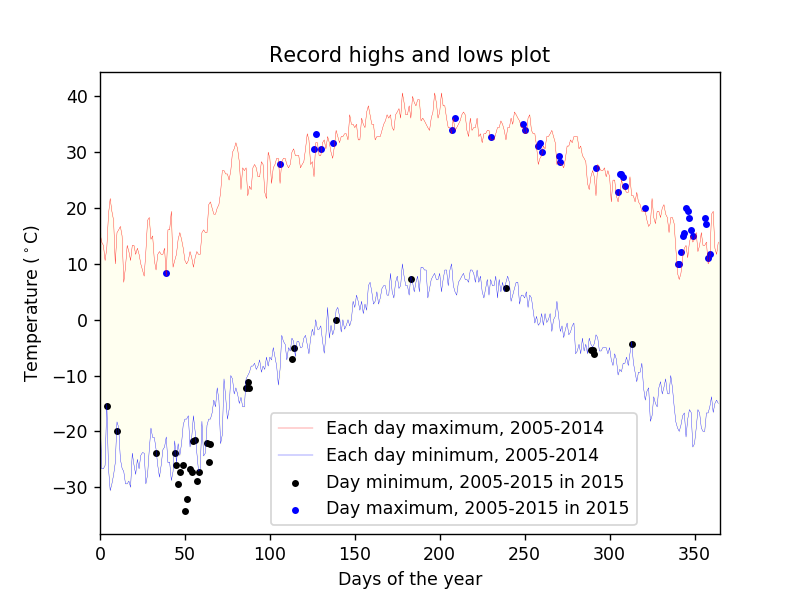

Text(0.5, 1.0, 'Record highs and lows plot')

In [12]:
#plot data using matplotlib

fig, ax=plt.subplots()
ax.plot(time,Max_T_2014,'r-',linewidth=0.2, label='Each day maximum, 2005-2014')
ax.plot(time,Min_T_2014,'b-',linewidth=0.2, label='Each day minimum, 2005-2014')
ax.set_xlabel('Days of the year')
ax.set_ylabel('Temperature ($^\circ$C)')
plt.xlim(xmin=0, xmax=365)

ax.fill_between(time,Max_T_2014,Min_T_2014,color='ivory')

# for loop to plot the conditional scatter plot on the same axes
for i in range(len(time)):
    if Max_T_2015[i]>Max_T_2014[i]:
        if i==39:
            ax.scatter(time[i],Max_T_2015[i],marker='.',c='b', label='Day maximum, 2005-2015 in 2015')
        else:
            ax.scatter(time[i],Max_T_2015[i],marker='.',c='b')
    elif Min_T_2015[i]<Min_T_2014[i]:
        if i==4:
            ax.scatter(time[i],Min_T_2015[i],marker='.',c='black', label='Day minimum, 2005-2015 in 2015')
        else:
            ax.scatter(time[i],Min_T_2015[i],marker='.',c='black')

            
ax.legend(bbox_to_anchor=(0.88,0), loc="lower right")
ax.set_title('Record highs and lows plot')